In [51]:
import pandas as pd
from IPython.display import Image


In [52]:
from six import StringIO
# 引入模型评价函数
from sklearn import model_selection, tree, metrics
# 引入决策树模型
from sklearn.tree import DecisionTreeClassifier
import pydotplus

In [53]:
# 读取数据集   read_cscv
df=pd.read_csv("D:/input/credit.csv")
# 输出数据集前十行   head(10)
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,unskilled resident,2,yes,yes,1
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,skilled employee,1,none,yes,1
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,mangement self-employed,1,yes,yes,1
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,1
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,mangement self-employed,1,none,yes,2


In [54]:
# 查看数据的规模    shape
df.shape

(1000, 21)

In [55]:
# 查看支票余额属性各个取值的分布
print(df["checking_balance"].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


In [56]:
# 查看储蓄账户余额的分布
print(df["savings_balance"].value_counts())

< 100 DM         603
unknown          183
101 - 500 DM     103
501 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64


In [57]:
# 查看贷款期限和贷款申请额度的分布情况
print("贷款期限\n")
print(df['months_loan_duration'].value_counts())
print("贷款申请额度\n")
print(df["amount"].value_counts())

贷款期限

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: months_loan_duration, dtype: int64
贷款申请额度

1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: amount, Length: 921, dtype: int64


In [58]:
# 贷款期限中位数
print("贷款期限中位数:"+str(df['months_loan_duration'].median()))
# 贷款申请额度中位数
print("贷款申请额度中位数:"+str(df['amount'].median()))

贷款期限中位数:18.0
贷款申请额度中位数:2319.5


In [59]:
# 查看数据集中违约和非违约样本的数量。
print("违约数量:"+str(df['default'].value_counts()[1]))
print("未违约数量:"+str(df['default'].value_counts()[2]))

违约数量:700
未违约数量:300


In [60]:
cp=df.copy()


In [61]:
dicts={}
for column_name,column_data in df.iteritems():
    if str(df[column_name].dtype)!="int64":
        new_dict={}
        cnt=0
        for var in df[column_name].unique():
            new_dict[str(var)]=cnt
            cnt+=1
        #print(new_dict)
        dicts[column_name]=new_dict
#print(dicts)
for column in dicts.keys():
    df[column]=df[column].map(dicts[column])
df.head(5)

C:\Users\42450\AppData\Local\Temp\ipykernel_26148\294221933.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,column_data in df.iteritems():


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,0,6,0,0,1169,0,0,4,0,0,...,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,1,1,2,1,0,...,0,22,0,0,1,0,1,1,0,2
2,2,12,0,1,2096,1,2,2,0,0,...,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,1,2,2,0,1,...,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,1,1,3,0,0,...,2,53,0,1,2,0,2,1,0,2


In [62]:
# 确定因变量
y = df['default']
# 确定自变量
X = df.loc[:, 'checking_balance':'foreign_worker']
# 划分训练集和测试集，random_state=1表示先打乱顺序再划分，测试集占比30%
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [63]:
# 查看训练集中违约和非违约样本的分布
y_train.value_counts() / len(y_train)

1    0.694286
2    0.305714
Name: default, dtype: float64

In [64]:
# 查看测试集中违约和非违约样本的分布
y_test.value_counts() / len(y_test)

1    0.713333
2    0.286667
Name: default, dtype: float64

In [65]:
credit_model = DecisionTreeClassifier(min_samples_leaf=6, random_state=1)
# 训练模型
credit_model.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=6, random_state=1)

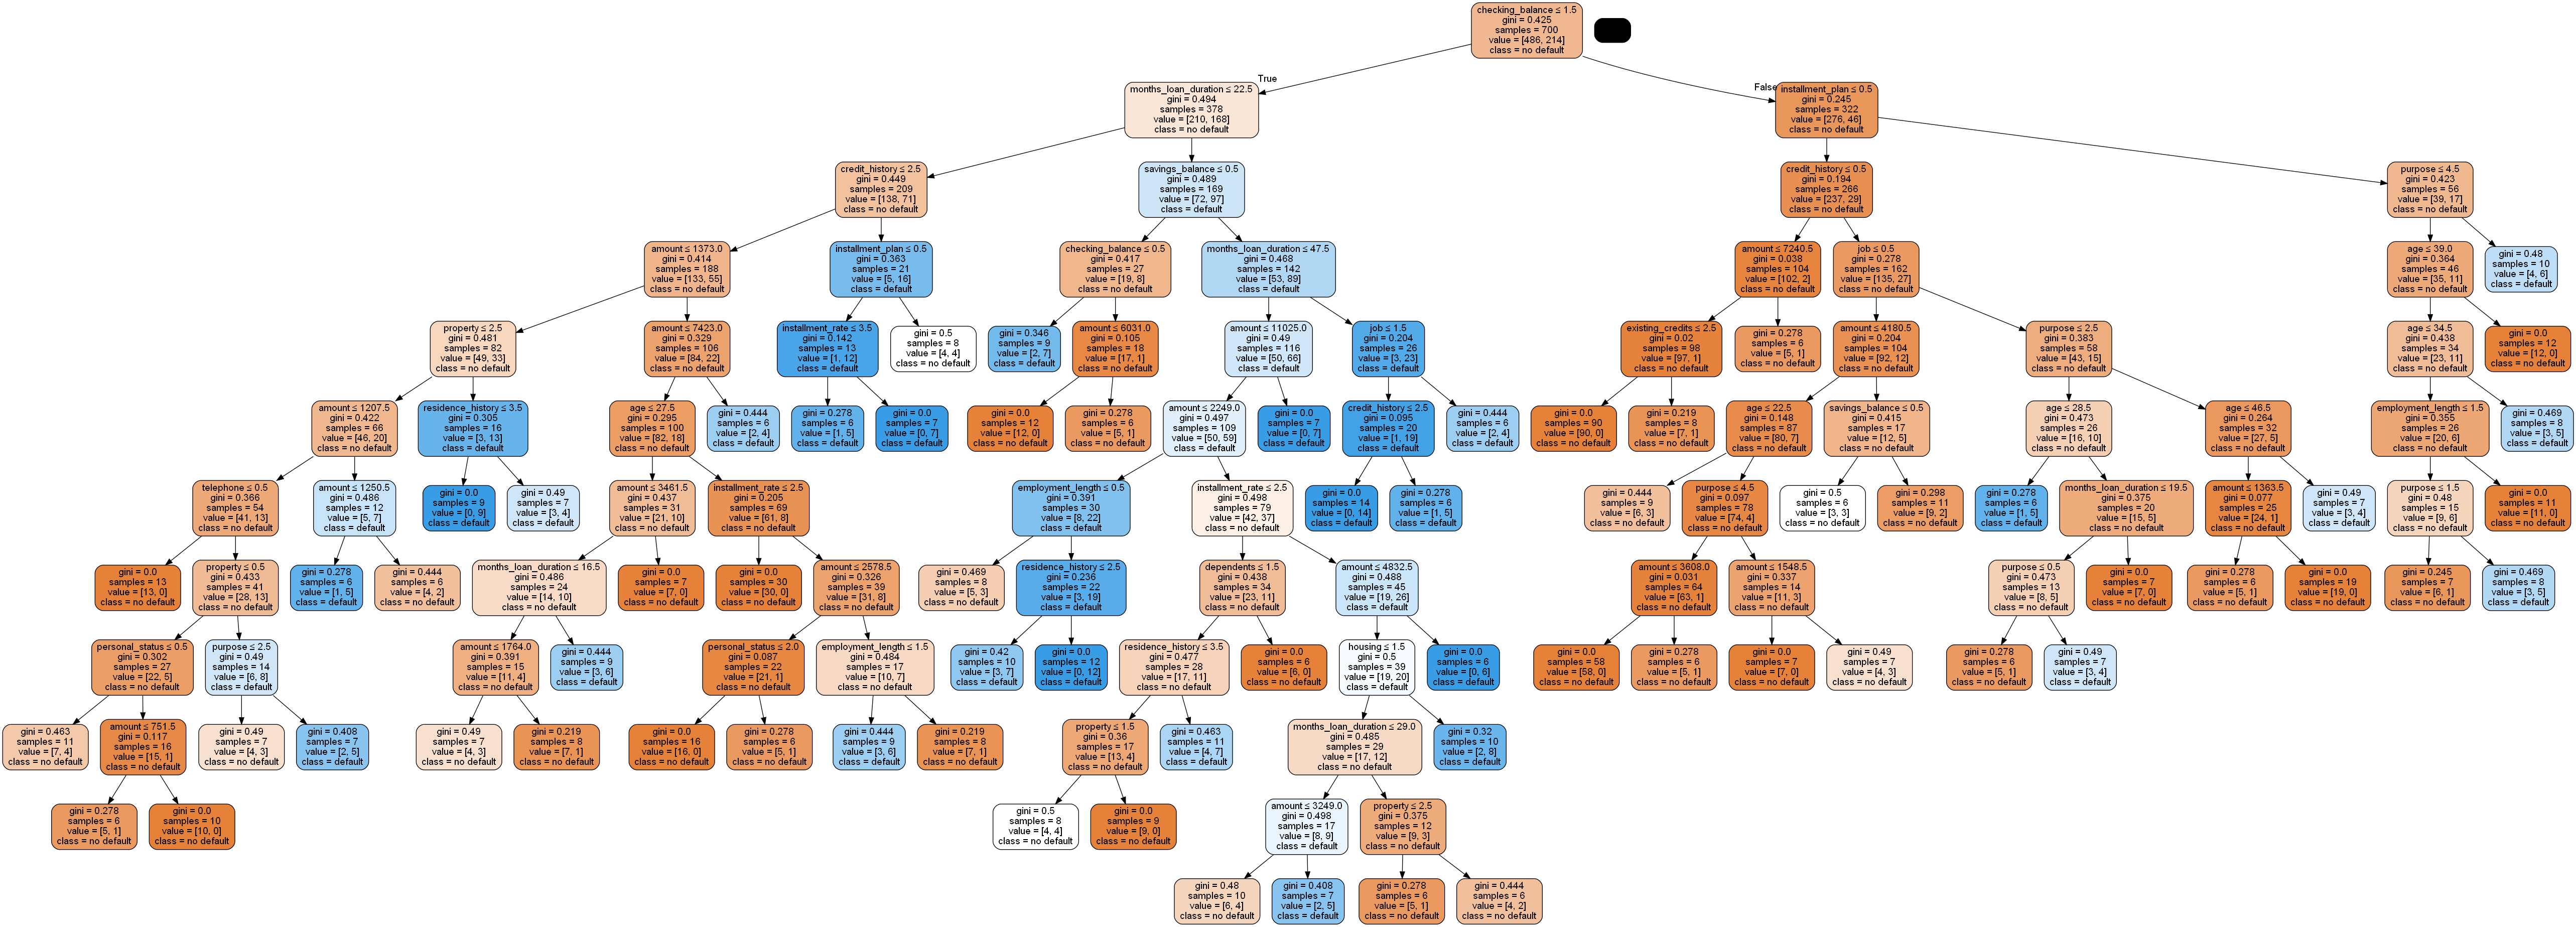

In [66]:
# 获取决策树的数据
dot_data = StringIO()
# 决策树构建
tree.export_graphviz(credit_model, out_file=dot_data,
                     feature_names=X_train.columns,
                     class_names=['no default', 'default'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
Image(graph.create_png())

In [67]:
credit_pred = credit_model.predict(X_test)
print(metrics.classification_report(y_test, credit_pred))

              precision    recall  f1-score   support

           1       0.80      0.82      0.81       214
           2       0.52      0.49      0.50        86

    accuracy                           0.72       300
   macro avg       0.66      0.65      0.66       300
weighted avg       0.72      0.72      0.72       300



In [68]:
metrics.confusion_matrix(y_test, credit_pred)
print(metrics.accuracy_score(y_test, credit_pred))

0.7233333333333334


In [69]:
class_weights = {1: 1, 2: 4}
credit_model_cost = DecisionTreeClassifier(max_depth=6, class_weight=class_weights)
credit_model_cost.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={1: 1, 2: 4}, max_depth=6)

In [70]:
credit_pred_cost = credit_model_cost.predict(X_test)
print(metrics.classification_report(y_test, credit_pred_cost))
print(metrics.confusion_matrix(y_test, credit_pred_cost))
print(metrics.accuracy_score(y_test, credit_pred_cost))


              precision    recall  f1-score   support

           1       0.88      0.57      0.69       214
           2       0.43      0.81      0.56        86

    accuracy                           0.64       300
   macro avg       0.66      0.69      0.63       300
weighted avg       0.75      0.64      0.66       300

[[122  92]
 [ 16  70]]
0.64
